<a href="https://colab.research.google.com/github/KiranVarghese25/ml_labfiles/blob/main/Ml_lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_curve, PrecisionRecallDisplay, classification_report
from sklearn.svm import SVC as svc
import seaborn as sb

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/archive (6)/Training'

In [4]:
classes = {'no_tumor': 0, 'pituitary_tumor': 1}
x = []
y = []
for cls in classes:
  pth = os.path.join(path, cls)
  for j in os.listdir(pth):
    img = cv2.imread(os.path.join(pth, j), 0)
    img = cv2.resize(img, (200, 200))
    x.append(img)
    y.append(classes[cls])

In [5]:
X = np.array(x)
Y = np.array(y)


In [6]:
class_count=pd.Series(Y).value_counts()
class_count

1    827
0    395
dtype: int64

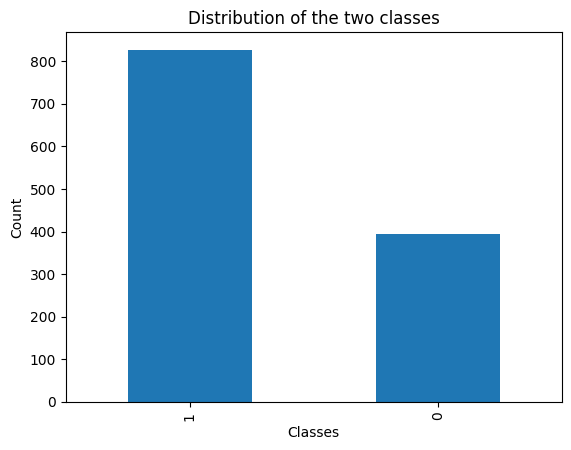

In [7]:
class_count.plot(kind='bar')
plt.title('Distribution of the two classes')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

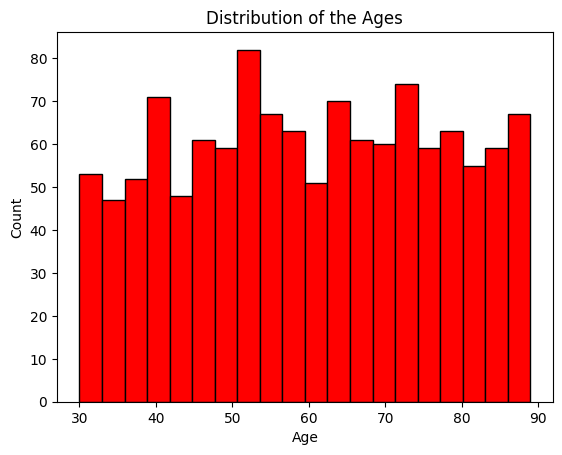

In [8]:
#generating ages using numpy
ages = np.random.randint(30, 90, size=1222)
plt.hist(ages,bins=20, color='red',edgecolor='black')
plt.title('Distribution of the Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

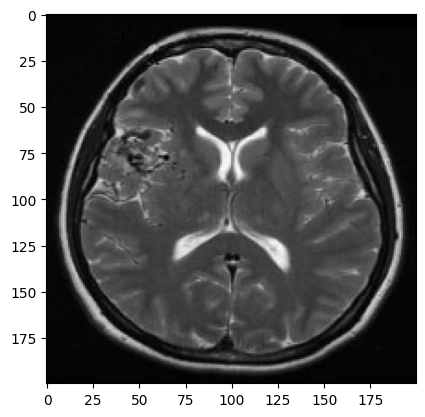

In [9]:
plt.imshow(X[0], cmap='gray')

In [10]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=0.2)

In [12]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())


255 0
255 0
1.0 0.0
1.0 0.0


In [13]:
#model building
svm_model = svc()
svm_model.fit(xtrain, ytrain)

SVC()

In [14]:
print("Training Score:", svm_model.score(xtrain, ytrain))
print("Testing Score:", svm_model.score(xtest, ytest))

Training Score: 0.9918116683725691
Testing Score: 0.9387755102040817


In [15]:
ypred = svm_model.predict(xtest)
misclassified=np.where(ytest!=ypred)
misclassified

(array([ 35,  49,  51,  59,  62,  65,  80,  89, 147, 158, 159, 204, 216,
        236, 237]),)

In [16]:
print("Total Misclassified Samples: ",len(misclassified[0]))

Total Misclassified Samples:  15


In [17]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        81
           1       0.93      0.98      0.96       164

    accuracy                           0.94       245
   macro avg       0.94      0.92      0.93       245
weighted avg       0.94      0.94      0.94       245



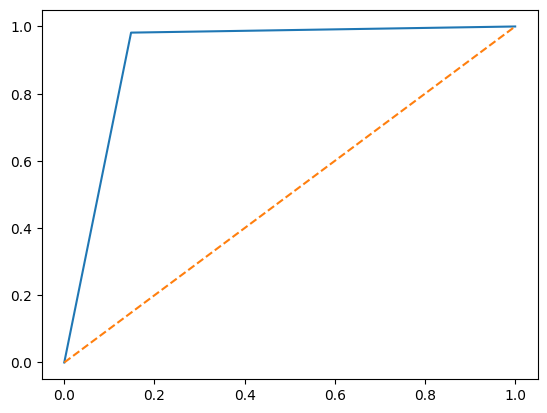

In [18]:
fpr, tpr, thr = roc_curve(ytest, ypred)
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--");

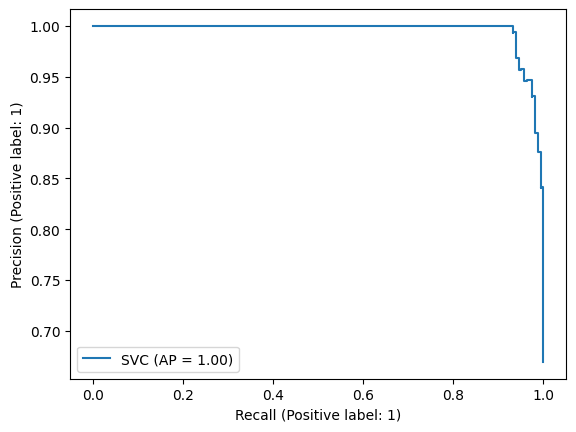

In [19]:
PrecisionRecallDisplay.from_estimator(svm_model, xtest, ytest);

In [20]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

In [21]:
test_path = '/content/drive/MyDrive/archive (6)/Testing'
x_test_data = []
y_test_data = []





In [22]:
for cls in classes:
  pth = os.path.join(path, cls)
  for j in os.listdir(pth):
    img = cv2.imread(os.path.join(pth, j), 0)
    img = cv2.resize(img, (200, 200))
    x_test_data.append(img)
    y_test_data.append(classes[cls])

In [23]:
x_test_data = np.array(x_test_data)
y_test_data = np.array(y_test_data)



In [24]:
X_test_updted=x_test_data.reshape(x_test_data.shape[0],-1)
Y_pred_test=svm_model.predict(X_test_updted)

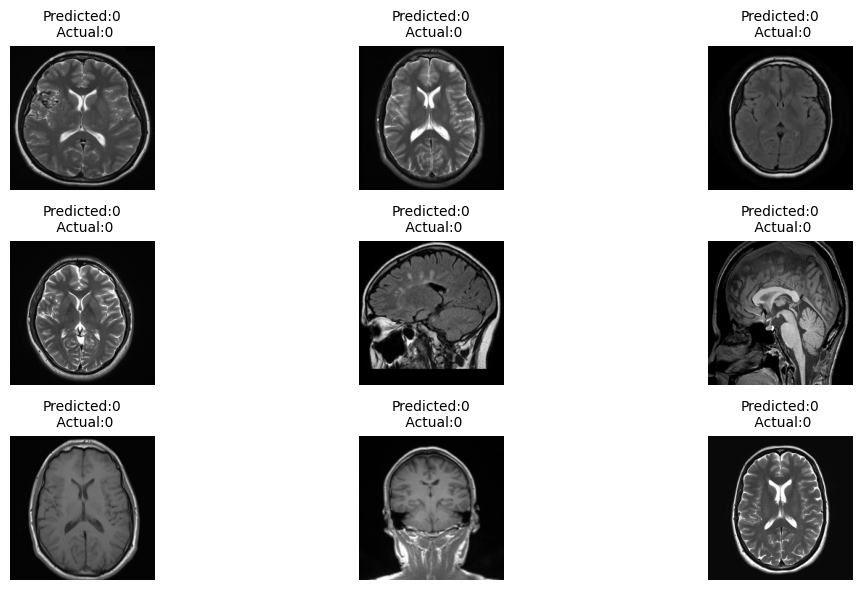

In [27]:
plt.figure(figsize=(12,6))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_test_data[i], cmap='gray')
  plt.title(f'Predicted:{Y_pred_test[i]}\n Actual:{y_test_data[i]}', fontsize=10)
  plt.axis('off')
plt.tight_layout()
plt.show()